In [1]:
import pandas as pd
from IPython.display import display
from IPython.display import Image

In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon
from pysal.lib import weights
from pysal.explore import esda
from pysal.viz import mapclassify
from pysal.viz.splot.mapping import vba_choropleth
import os
#import needed libraries. Also, I used PySal environment that we used at Cph

In [3]:
os.chdir("/Users/shym/Downloads/")
#changing working directory

In [4]:
data = "ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp" 

In [5]:
# Read file using gpd.read_file() 
data_shapefile = gpd.read_file(data)

print ("The type of data is", type(data_shapefile))

print(data_shapefile.head(10)) 
#reading countries file

The type of data is <class 'geopandas.geodataframe.GeoDataFrame'>
        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   
5  Admin-0 country          1          3                   Kazakhstan    KAZ   
6  Admin-0 country          1          3                   Uzbekistan    UZB   
7  Admin-0 country          1          2             Papua New Guinea    PNG   
8  Admin-0 country          1          2                    Indonesia    IDN   
9  Admin-0 country          1          2                    Argentina    ARG   

   ADM0_DIF  LEVEL               TYPE                

In [6]:
data_shapefile.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,POLYGON ((33.90371119710453 -0.950000000000000...
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,POLYGON ((-8.665589565454809 27.65642588959236...
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


In [7]:
data_table = pd.read_csv("under5mortality.csv") 
data_table
#opening .csv file

,Unnamed: 0,ISO,Name,ChildMortality
0,1,AFG,Afghanistan,67.9
1,4,ALB,Albania,8.8
2,7,DZA,Algeria,24.0
3,10,AND,Andorra,3.3
4,13,AGO,Angola,81.1
5,16,ATG,Antigua and Barbuda,7.4
6,19,ARG,Argentina,10.4
7,22,ARM,Armenia,12.6
8,25,AUS,Australia,3.5
9,28,AUT,Austria,3.6


In [8]:
data_table_new = data_table.rename(columns={'ISO': 'SOV_A3'})
data_table_new
#changing ISO name to SOV_A3 name. This is needed for future joining

,Unnamed: 0,SOV_A3,Name,ChildMortality
0,1,AFG,Afghanistan,67.9
1,4,ALB,Albania,8.8
2,7,DZA,Algeria,24.0
3,10,AND,Andorra,3.3
4,13,AGO,Angola,81.1
5,16,ATG,Antigua and Barbuda,7.4
6,19,ARG,Argentina,10.4
7,22,ARM,Armenia,12.6
8,25,AUS,Australia,3.5
9,28,AUT,Austria,3.6


In [9]:
fulldata=pd.merge(data_shapefile, data_table_new, on='SOV_A3', how='left')
fulldata
#join data on a left join

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,Unnamed: 0,Name,ChildMortality
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",181.0,Fiji,25.3
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,POLYGON ((33.90371119710453 -0.950000000000000...,559.0,United Republic of Tanzania,54.0
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,POLYGON ((-8.665589565454809 27.65642588959236...,NaN,NaN,NaN
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"(POLYGON ((-122.84 49.00000000000011, -122.974...",97.0,Canada,5.1
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"(POLYGON ((-122.84 49.00000000000011, -120 49....",NaN,NaN,NaN
5,Admin-0 country,1,3,Kazakhstan,KAZ,0,2,Sovereign country,Kazakhstan,KAZ,...,Cazaquistão,Казахстан,Kazakstan,Kazakistan,Kazakhstan,哈萨克斯坦,"POLYGON ((87.35997033076265 49.21498078062912,...",265.0,Kazakhstan,10.0
6,Admin-0 country,1,3,Uzbekistan,UZB,0,2,Sovereign country,Uzbekistan,UZB,...,Usbequistão,Узбекистан,Uzbekistan,Özbekistan,Uzbekistan,乌兹别克斯坦,"POLYGON ((55.96819135928291 41.30864166926936,...",568.0,Uzbekistan,22.5
7,Admin-0 country,1,2,Papua New Guinea,PNG,0,2,Sovereign country,Papua New Guinea,PNG,...,Papua-Nova Guiné,Папуа-Новая Гвинея,Papua Nya Guinea,Papua Yeni Gine,Papua New Guinea,巴布亚新几内亚,(POLYGON ((141.0002104025918 -2.60015105551566...,400.0,Papua New Guinea,53.4
8,Admin-0 country,1,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,(POLYGON ((141.0002104025918 -2.60015105551566...,238.0,Indonesia,25.4
9,Admin-0 country,1,2,Argentina,ARG,0,2,Sovereign country,Argentina,ARG,...,Argentina,Аргентина,Argentina,Arjantin,Argentina,阿根廷,(POLYGON ((-68.63401022758323 -52.636370458874...,19.0,Argentina,10.4


In [10]:
w_k1 = weights.KNN.from_dataframe(fulldata, k=1)
#build weights based on K Nearest Neighbors

/Users/shym/anaconda3/envs/PySal/lib/python3.6/site-packages/pysal/lib/weights/weights.py:170: UserWarning: The weights matrix is not fully connected. There are 46 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)


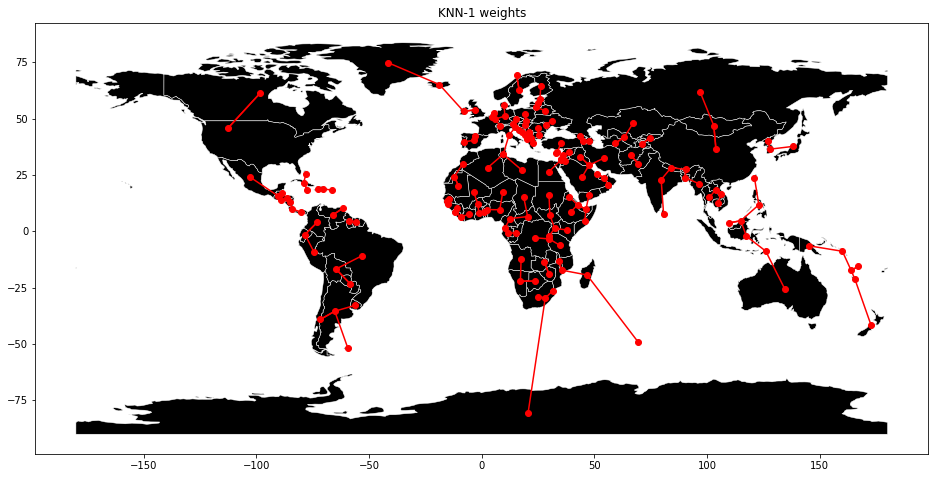

In [11]:
f, ax = plt.subplots(figsize=(16, 8))

fulldata.plot(color='k', ax=ax, 
        edgecolor='w', linewidth=0.5)

w_k1.plot(fulldata, ax=ax, color='red')
ax.set_title('KNN-1 weights')

plt.show()
#visualizing weight matrix

In [14]:
np.random.seed(1234)
fulldata['RandomChildMortality'] = fulldata['ChildMortality'].sample(frac=1).values
fulldata

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,Unnamed: 0,Name,ChildMortality,RandomChildMortality
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,Фиджи,Fiji,Fiji,Fiji,斐濟,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",181.0,Fiji,25.3,47.3
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,POLYGON ((33.90371119710453 -0.950000000000000...,559.0,United Republic of Tanzania,54.0,67.9
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,POLYGON ((-8.665589565454809 27.65642588959236...,NaN,NaN,NaN,74.7
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,Канада,Kanada,Kanada,Canada,加拿大,"(POLYGON ((-122.84 49.00000000000011, -122.974...",97.0,Canada,5.1,19.0
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"(POLYGON ((-122.84 49.00000000000011, -120 49....",NaN,NaN,NaN,13.7
5,Admin-0 country,1,3,Kazakhstan,KAZ,0,2,Sovereign country,Kazakhstan,KAZ,...,Казахстан,Kazakstan,Kazakistan,Kazakhstan,哈萨克斯坦,"POLYGON ((87.35997033076265 49.21498078062912,...",265.0,Kazakhstan,10.0,12.4
6,Admin-0 country,1,3,Uzbekistan,UZB,0,2,Sovereign country,Uzbekistan,UZB,...,Узбекистан,Uzbekistan,Özbekistan,Uzbekistan,乌兹别克斯坦,"POLYGON ((55.96819135928291 41.30864166926936,...",568.0,Uzbekistan,22.5,50.3
7,Admin-0 country,1,2,Papua New Guinea,PNG,0,2,Sovereign country,Papua New Guinea,PNG,...,Папуа-Новая Гвинея,Papua Nya Guinea,Papua Yeni Gine,Papua New Guinea,巴布亚新几内亚,(POLYGON ((141.0002104025918 -2.60015105551566...,400.0,Papua New Guinea,53.4,4.2
8,Admin-0 country,1,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,(POLYGON ((141.0002104025918 -2.60015105551566...,238.0,Indonesia,25.4,55.4
9,Admin-0 country,1,2,Argentina,ARG,0,2,Sovereign country,Argentina,ARG,...,Аргентина,Argentina,Arjantin,Argentina,阿根廷,(POLYGON ((-68.63401022758323 -52.636370458874...,19.0,Argentina,10.4,15.0


In [15]:
moran = esda.Moran(fulldata['ChildMortality'], w_k1)
moran.I
#calculate Moran I for child mortality. We have error because we have NoData rows in ChildMortality column

nan

In [16]:
fulldata[fulldata['ChildMortality'].isnull()]
#substiture NoData with zero

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,Unnamed: 0,Name,ChildMortality,RandomChildMortality
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,POLYGON ((-8.665589565454809 27.65642588959236...,NaN,NaN,NaN,74.7
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"(POLYGON ((-122.84 49.00000000000011, -120 49....",NaN,NaN,NaN,13.7
20,Admin-0 country,1,5,United Kingdom,GB1,1,2,Dependency,Falkland Islands,FLK,...,Фолклендские острова,Falklandsöarna,Falkland Adaları,Quần đảo Falkland,福克兰群岛,"POLYGON ((-61.2 -51.85, -60 -51.25, -59.15 -51...",NaN,NaN,NaN,30.9
22,Admin-0 country,1,3,Denmark,DN1,1,2,Country,Greenland,GRL,...,Гренландия,Grönland,Grönland,Greenland,格陵兰,"POLYGON ((-46.76379 82.62796, -43.40644 83.225...",NaN,NaN,NaN,5.3
23,Admin-0 country,3,6,France,FR1,1,2,Dependency,French Southern and Antarctic Lands,ATF,...,Французские Южные и Антарктические территории,Franska sydterritorierna,Fransız Güney ve Antarktika Toprakları,Vùng đất phía Nam và châu Nam Cực thuộc Pháp,法属南部领地,"POLYGON ((68.935 -48.62500000000001, 69.58 -48...",NaN,NaN,NaN,10.8
43,Admin-0 country,1,2,France,FR1,1,2,Country,France,FRA,...,Франция,Frankrike,Fransa,Pháp,法国,(POLYGON ((-51.65779741067889 4.15623240805302...,NaN,NaN,NaN,5.7
45,Admin-0 country,1,5,United States of America,US1,1,2,Dependency,Puerto Rico,PRI,...,Пуэрто-Рико,Puerto Rico,Porto Riko,Puerto Rico,波多黎各,POLYGON ((-66.28243445500821 18.51476166429536...,NaN,NaN,NaN,48.6
76,Admin-0 country,1,4,Israel,IS1,1,2,Country,Israel,ISR,...,Израиль,Israel,İsrail,Israel,以色列,"POLYGON ((35.71991824722275 32.70919240979487,...",NaN,NaN,NaN,58.5
79,Admin-0 country,1,5,Israel,IS1,1,2,Disputed,Palestine,PSX,...,Палестина,Palestina,Filistin,Palestine,巴勒斯坦,"POLYGON ((35.39756066258605 31.48908600516758,...",NaN,NaN,NaN,127.2
130,Admin-0 country,1,5,Netherlands,NL1,1,2,Country,Netherlands,NLD,...,Нидерланды,Nederländerna,Hollanda,Hà Lan,荷蘭,"POLYGON ((6.905139601274129 53.48216217713065,...",NaN,NaN,NaN,72.4


In [17]:
fulldata.ChildMortality.fillna(0, inplace=True)
fulldata[fulldata['ChildMortality'].isnull()]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,Unnamed: 0,Name,ChildMortality,RandomChildMortality


In [18]:
moran = esda.Moran(fulldata['ChildMortality'], w_k1)
moran.I
#calculate Moran I

0.6335898394928973

In [19]:
moran.p_sim
#calculate p-value

0.001

In [22]:
moranRandom = esda.Moran(fulldata['RandomChildMortality'], w_k1)
moranRandom.I

nan

In [23]:
fulldata[fulldata['RandomChildMortality'].isnull()]
#substiture NoData with zero

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,Unnamed: 0,Name,ChildMortality,RandomChildMortality
18,Admin-0 country,1,2,Russia,RUS,0,2,Sovereign country,Russia,RUS,...,Россия,Ryssland,Rusya,Nga,俄罗斯,"(POLYGON ((178.7253 71.0988, 180.0000000000001...",430.0,Russian Federation,7.6,NaN
19,Admin-0 country,1,4,The Bahamas,BHS,0,2,Sovereign country,The Bahamas,BHS,...,Багамские Острова,Bahamas,Bahamalar,Bahamas,巴哈马,"(POLYGON ((-78.98 26.79, -78.51000000000001 26...",34.0,Bahamas,7.2,NaN
30,Admin-0 country,1,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,POLYGON ((-69.52967810736496 -10.9517343075021...,61.0,Bolivia (Plurinational State of),34.9,NaN
34,Admin-0 country,1,5,Costa Rica,CRI,0,2,Sovereign country,Costa Rica,CRI,...,Коста-Рика,Costa Rica,Kosta Rika,Costa Rica,哥斯达黎加,POLYGON ((-82.54619625520348 9.566134751824677...,124.0,Costa Rica,9.0,NaN
49,Admin-0 country,1,4,Botswana,BWA,0,2,Sovereign country,Botswana,BWA,...,Ботсвана,Botswana,Botsvana,Botswana,波札那,POLYGON ((29.43218834810904 -22.09131275806759...,67.0,Botswana,37.6,NaN
52,Admin-0 country,1,3,Mali,MLI,0,2,Sovereign country,Mali,MLI,...,Мали,Mali,Mali,Mali,马里共和国,POLYGON ((-11.51394283695059 12.44298757572942...,319.0,Mali,106.0,NaN
61,Admin-0 country,1,3,Guinea,GIN,0,2,Sovereign country,Guinea,GIN,...,Гвинея,Guinea,Gine,Guinée,几内亚,POLYGON ((-13.70047604008433 12.58618296961019...,214.0,Guinea,85.7,NaN
63,Admin-0 country,1,4,Liberia,LBR,0,2,Sovereign country,Liberia,LBR,...,Либерия,Liberia,Liberya,Liberia,利比里亚,POLYGON ((-8.439298468448698 7.686042792181738...,292.0,Liberia,74.7,NaN
65,Admin-0 country,1,3,Burkina Faso,BFA,0,2,Sovereign country,Burkina Faso,BFA,...,Буркина-Фасо,Burkina Faso,Burkina Faso,Burkina Faso,布吉納法索,POLYGON ((-5.404341599946974 10.37073680260915...,79.0,Burkina Faso,81.2,NaN
70,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,...,Замбия,Zambia,Zambiya,Zambia,赞比亚,"POLYGON ((30.7400097314221 -8.340005930353721,...",583.0,Zambia,60.0,NaN


In [24]:
fulldata.RandomChildMortality.fillna(0, inplace=True)
fulldata[fulldata['RandomChildMortality'].isnull()]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,Unnamed: 0,Name,ChildMortality,RandomChildMortality


In [25]:
moranRandom = esda.Moran(fulldata['RandomChildMortality'], w_k1)
moranRandom.I

0.10013812829061101

In [26]:
moranRandom.p_sim

0.121